# EDA

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color=sns.color_palette()
%matplotlib inline

### Load Dataset

In [2]:
import os, fnmatch
import pandas as pd

listOfFiles = os.listdir('.')  
pattern = "*.csv"  
for entry in listOfFiles:  
    if fnmatch.fnmatch(entry, pattern):
        read_File_as_DF=pd.read_csv(entry)
read_File_as_DF.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [3]:
data= read_File_as_DF.copy()

In [4]:
data.shape

(1554, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 5 columns):
date      1554 non-null object
state     1554 non-null object
fips      1554 non-null int64
cases     1554 non-null int64
deaths    1554 non-null int64
dtypes: int64(3), object(2)
memory usage: 60.8+ KB


In [6]:
data.describe()

,fips,cases,deaths
count,1554.000000,1554.000000,1554.000000
mean,30.609395,583.439511,9.594595
std,17.887534,3431.313441,53.014611
min,1.000000,1.000000,0.000000
25%,17.000000,4.000000,0.000000
50%,30.000000,31.000000,0.000000
75%,46.000000,203.750000,3.000000
max,78.000000,67174.000000,1224.000000


In [7]:
data.corr()

,fips,cases,deaths
fips,1.000000,0.005051,0.013851
cases,0.005051,1.000000,0.951189
deaths,0.013851,0.951189,1.000000


## Visualization 

Now we can start looking for relations between the data. For example, let's take a look at the amount of desths per state.


### Bar chart 

deaths\state

In [8]:
state_total_deaths = data.groupby('state', as_index=False)['deaths'].sum()
state_total_deaths.sort_values(by=['deaths'], inplace=True, ascending=False)
state_total_deaths.head()


,state,deaths
33,New York,4991
51,Washington,2145
4,California,921
31,New Jersey,897
19,Louisiana,896


In [9]:
x = np.array(state_total_deaths['state'])
y = np.array(state_total_deaths['deaths'])
#print(x)
#y    

Text(0.5, 1.0, 'United States Total Number of Deaths Bar Chart of Each States')

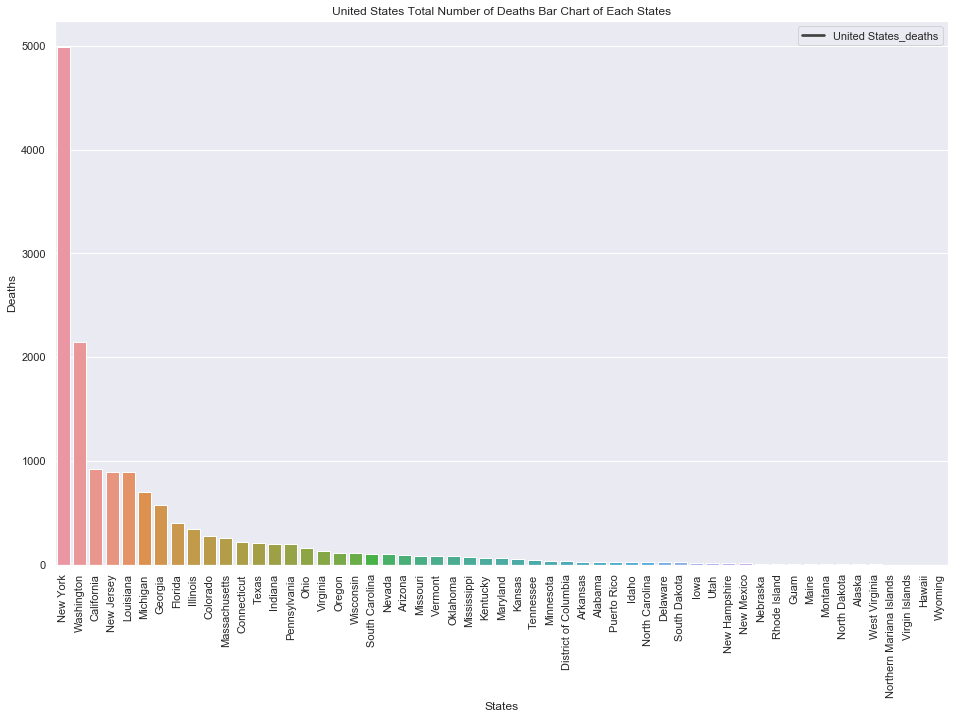

In [10]:
plt.figure(figsize=(16,10))
sns.set(style="darkgrid")
sns.barplot(x, y)
plt.legend(['United States_deaths'])
plt.xlabel('States')
plt.ylabel('Deaths')
plt.xticks(rotation=90)
plt.title('United States Total Number of Deaths Bar Chart of Each States')

### Bar chart 

cases\state

In [11]:
state_total_cases = data.groupby('state', as_index=False)['cases'].sum()
state_total_cases.sort_values(by=['cases'], inplace=True, ascending=False)
state_total_cases.head()


,state,cases
33,New York,387714
31,New Jersey,73838
4,California,47065
51,Washington,40990
23,Michigan,31601


In [12]:
x = np.array(state_total_cases['state'])
y = np.array(state_total_cases['cases'])
#print(x)
#y    

Text(0.5, 1.0, 'United States Total Number of Patient Cases Bar Chart of Each States')

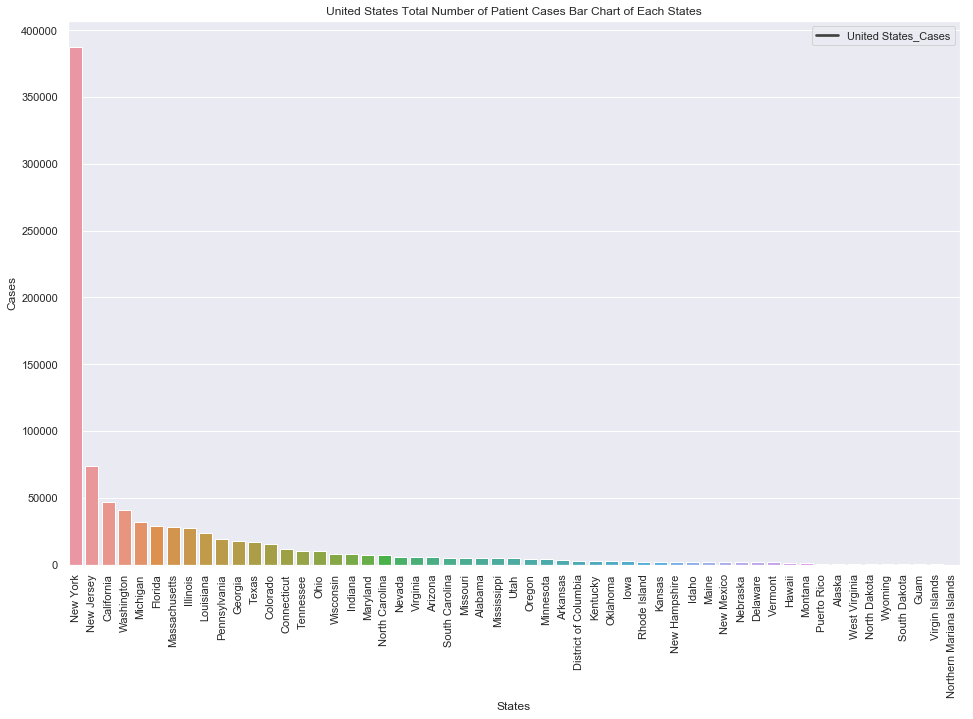

In [13]:
plt.figure(figsize=(16,10))
sns.set(style="darkgrid")
sns.barplot(x, y)
#group_state_deaths.plot(kind = 'bar')
plt.legend(['United States_Cases'])
plt.xlabel('States')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.title('United States Total Number of Patient Cases Bar Chart of Each States')

### Bar chart 

deaths\date

In [14]:
date_total_deaths = data.groupby('date', as_index=False)['deaths'].sum()
date_total_deaths.sort_values(by=['deaths'], inplace=True, ascending=False)
date_total_deaths.head()


,date,deaths
69,2020-03-30,3073
68,2020-03-29,2486
67,2020-03-28,2134
66,2020-03-27,1649
65,2020-03-26,1275


In [15]:
x = np.array(date_total_deaths['date'])
y = np.array(date_total_deaths['deaths'])
#print(x)
#y    

Text(0.5, 1.0, 'United States Total Number of Patient Deaths Bar Chart of Per Day')

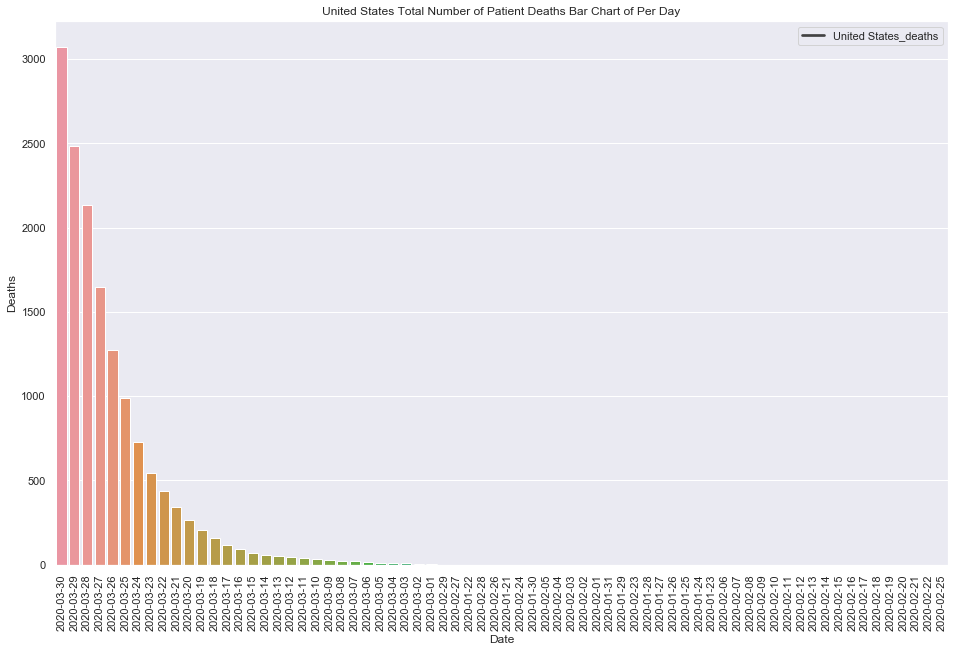

In [16]:
plt.figure(figsize=(16,10))
sns.set(style="darkgrid")
sns.barplot(x, y)
plt.legend(['United States_deaths'])
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.xticks(rotation=90)
plt.title('United States Total Number of Patient Deaths Bar Chart of Per Day')

### Bar chart 

cases\date

In [17]:
date_total_cases = data.groupby('date', as_index=False)['cases'].sum()
date_total_cases.sort_values(by=['cases'], inplace=True, ascending=False)
date_total_cases.head()


,date,cases
69,2020-03-30,163796
68,2020-03-29,142161
67,2020-03-28,123628
66,2020-03-27,102648
65,2020-03-26,85533


In [18]:
x = np.array(date_total_cases['date'])
y = np.array(date_total_cases['cases'])
#print(x)
#y    

Text(0.5, 1.0, 'United States Total Number of New Patient Cases Bar Chart of Per Day')

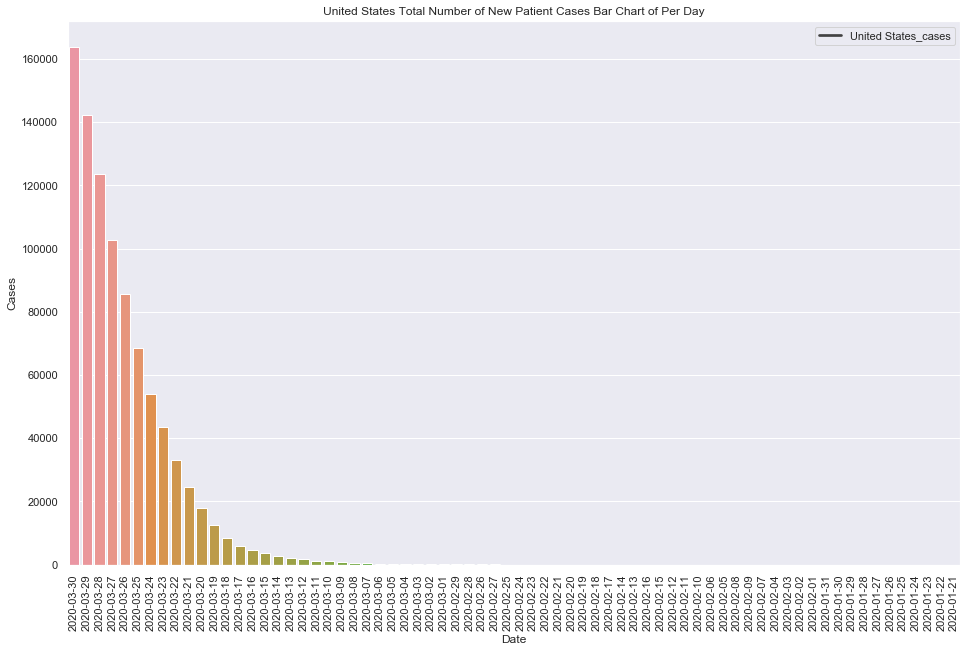

In [19]:
plt.figure(figsize=(16,10))
sns.set(style="darkgrid")
sns.barplot(x, y)
plt.legend(['United States_cases'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.title('United States Total Number of New Patient Cases Bar Chart of Per Day')

### Bar chart 

deaths\date and cases\date

In [20]:
## cases-1 deaths
state_total_deaths = data.groupby('state', as_index=False)['deaths'].sum()

state_total_deaths.head()


,state,deaths
0,Alabama,28
1,Alaska,5
2,Arizona,94
3,Arkansas,28
4,California,921


In [21]:
## ## cases-2 cases
state_total_cases = data.groupby('state', as_index=False)['cases'].sum()

state_total_cases.head()


,state,cases
0,Alabama,5130
1,Alaska,717
2,Arizona,5566
3,Arkansas,3405
4,California,47065


In [22]:
df = pd.merge(state_total_deaths, state_total_cases, on='state', how='outer')
df.sort_values(by=['cases'], inplace=True, ascending=False)
df.head()

,state,deaths,cases
33,New York,4991,387714
31,New Jersey,897,73838
4,California,921,47065
51,Washington,2145,40990
23,Michigan,702,31601


In [23]:
## make array
x = np.array(df['state'])
y = np.array(df['cases'])
z = np.array(df['deaths'])
#print(x)
#print(y)
#print(z)   

Text(0.5, 1.0, 'United States Total Number of Covid 19 Affected Population Bar Chart of Each States')

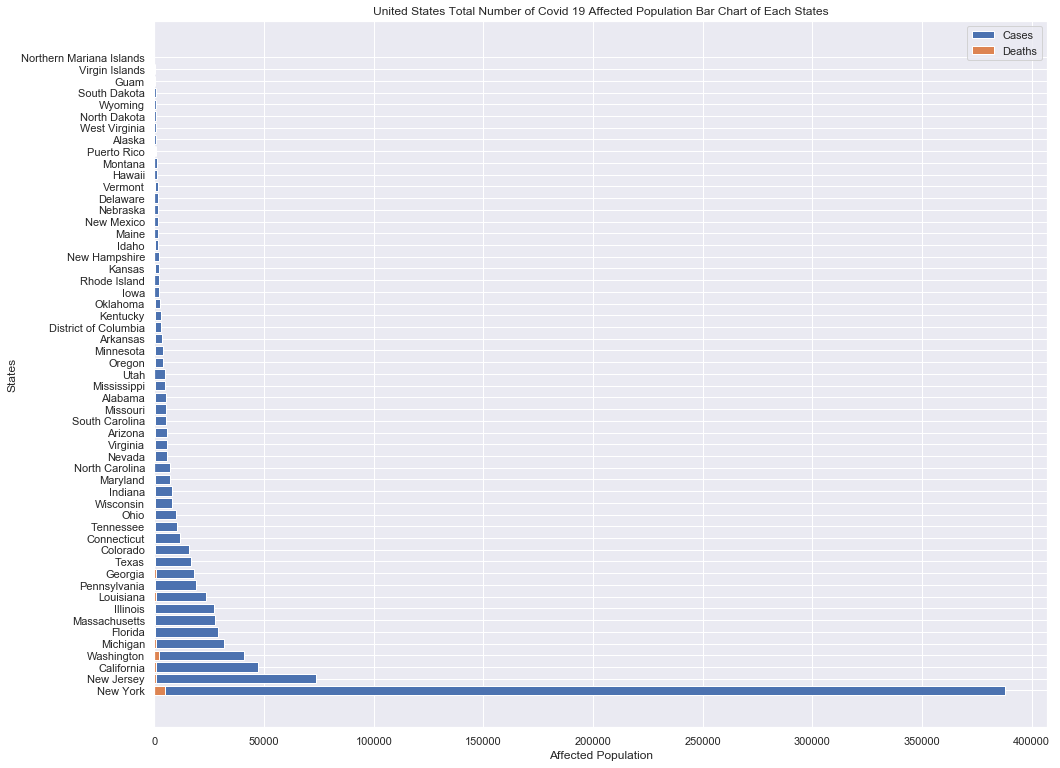

In [24]:
plt.figure(figsize=(16,13))
plt.barh(x, y, label='Cases')

plt.barh(x, z, label='Deaths')


plt.legend()
plt.xlabel('Affected Population')
plt.ylabel('States')
plt.title('United States Total Number of Covid 19 Affected Population Bar Chart of Each States')
#plt.xticks(rotation=90)

### Joint bar Chart

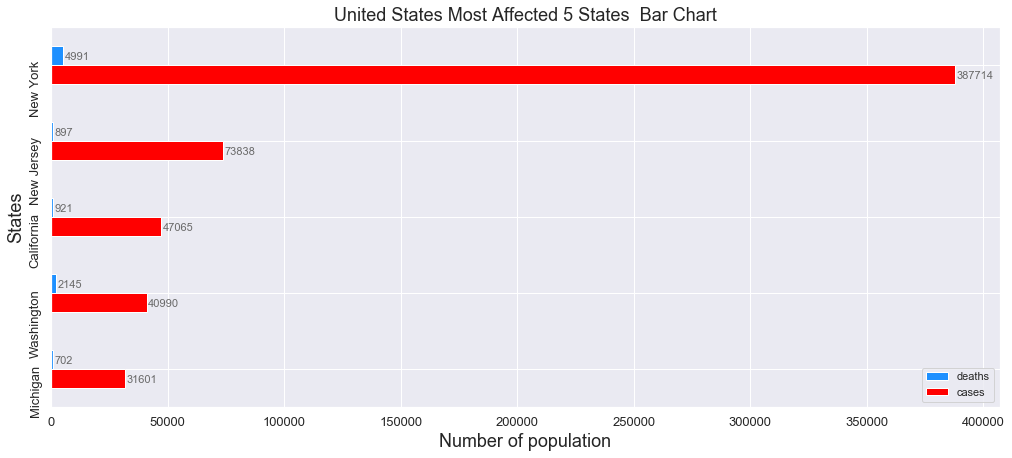

In [25]:
ax = df[['state', 'deaths','cases']].head(5).plot(kind='barh',
              figsize=(17,7), color=['dodgerblue', 'red'], fontsize=13, rot = 90);

ax.set_alpha(0.8)
ax.set_title('United States Most Affected 5 States  Bar Chart',fontsize=18)
ax.set_xlabel("Number of population", fontsize=18)
ax.set_ylabel("States", fontsize=18)

ax.set_yticklabels(["New York", "New Jersey","California","Washington","Michigan" ])
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+700, i.get_y()+.18, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()